# Imports


In [8]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer_multi_dimension import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [10]:
colors = get_colors()


def import_and_shuffle_csv(file_path):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [11]:
# file_path, drift_type = "./data/final_3d_brightness.csv", "BRIGHTNESS-3D"
# file_path, drift_type = "./data/final_4d_brightness.csv", "BRIGHTNESS-4D"
file_path, drift_type = "./data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [12]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-10, 20),
        y_limits=(0, 15),
    )

    return dynamic_clusterer

New model created - id: 10154
(id: 0 - cen: [4.65 3.85 1.07 1.92 7.63 8.3  3.77 8.86] - rad: 1.03)
(id: 1 - cen: [ 6.68  4.49 -0.96 -0.02  7.2   8.54  7.44  7.6 ] - rad: 1.04)
<!> Change detected! Possible input drift at timestamp 9 ----> Apply macroclustering <!>



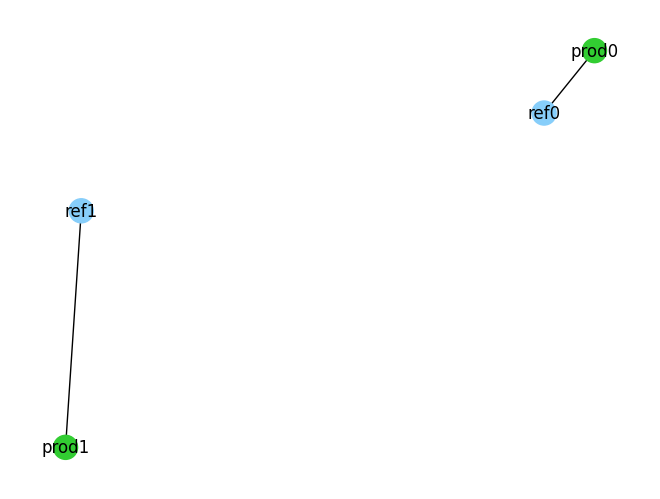

(id: 0 - cen: [4.65 3.85 1.07 1.92 7.63 8.3  3.77 8.86] - rad: 1.03) SURVIVED as (id: 0 - cen: [4.62 3.84 1.04 1.89 7.63 8.3  3.8  8.83] - rad: 1.08) (score: 0.9805062681426778)
(id: 1 - cen: [ 6.68  4.49 -0.96 -0.02  7.2   8.54  7.44  7.6 ] - rad: 1.04) SURVIVED as (id: 1 - cen: [ 6.62  4.48 -0.97 -0.01  7.22  8.55  7.43  7.59] - rad: 1.08) (score: 0.9759453109414373)
Final macroclusters:
(id: 0 - cen: [4.62 3.84 1.04 1.89 7.63 8.3  3.8  8.83] - rad: 1.08)
(id: 1 - cen: [ 6.62  4.48 -0.97 -0.01  7.22  8.55  7.43  7.59] - rad: 1.08)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 213 ----> Apply macroclustering <!>



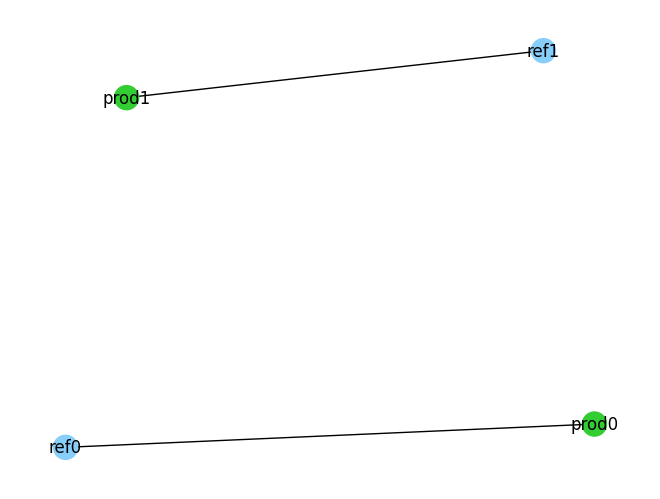

(id: 0 - cen: [4.62 3.84 1.04 1.89 7.63 8.3  3.8  8.83] - rad: 1.08) SURVIVED as (id: 0 - cen: [4.15 3.72 0.84 1.76 7.74 8.41 3.98 8.52] - rad: 1.29) (score: 0.8221899946112605)
(id: 1 - cen: [ 6.62  4.48 -0.97 -0.01  7.22  8.55  7.43  7.59] - rad: 1.08) SURVIVED as (id: 1 - cen: [ 6.18  4.45 -1.09  0.04  7.32  8.51  7.32  7.47] - rad: 1.2) (score: 0.8618162904625741)
Final macroclusters:
(id: 0 - cen: [4.15 3.72 0.84 1.76 7.74 8.41 3.98 8.52] - rad: 1.29)
(id: 1 - cen: [ 6.18  4.45 -1.09  0.04  7.32  8.51  7.32  7.47] - rad: 1.2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 427 ----> Apply macroclustering <!>



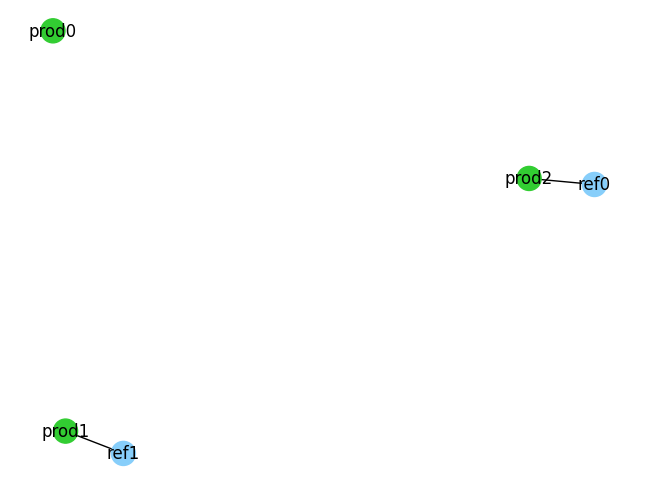

(!) (id: 2 - cen: [ 3.03  3.58 -0.48  0.57  8.1   8.59  5.59  6.85] - rad: 1.25) APPEARED --- (score: 0.5771518695969747)
(id: 1 - cen: [ 6.18  4.45 -1.09  0.04  7.32  8.51  7.32  7.47] - rad: 1.2) SURVIVED as (id: 1 - cen: [ 6.32  4.37 -0.98 -0.05  7.31  8.5   7.34  7.45] - rad: 1.29) (score: 0.9417110897669048)
(id: 0 - cen: [4.15 3.72 0.84 1.76 7.74 8.41 3.98 8.52] - rad: 1.29) SURVIVED as (id: 0 - cen: [4.59 3.83 1.1  1.96 7.6  8.3  3.68 8.93] - rad: 0.97) (score: 0.7886769920497949)
Final macroclusters:
(id: 0 - cen: [4.59 3.83 1.1  1.96 7.6  8.3  3.68 8.93] - rad: 0.97)
(id: 1 - cen: [ 6.32  4.37 -0.98 -0.05  7.31  8.5   7.34  7.45] - rad: 1.29)
(id: 2 - cen: [ 3.03  3.58 -0.48  0.57  8.1   8.59  5.59  6.85] - rad: 1.25)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 709 ----> Apply macroclustering <!>



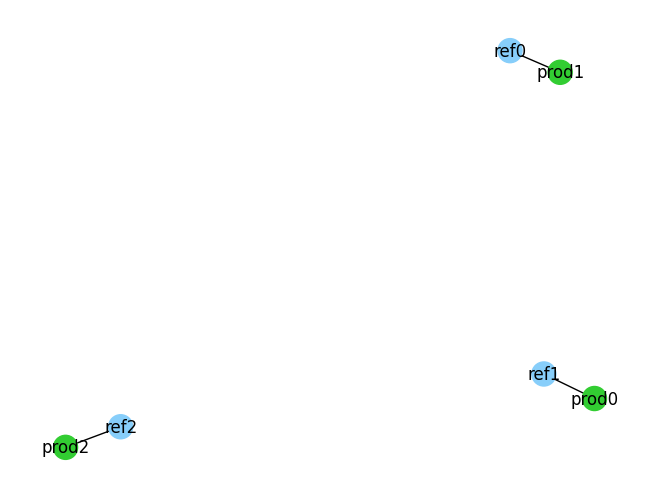

(id: 1 - cen: [ 6.32  4.37 -0.98 -0.05  7.31  8.5   7.34  7.45] - rad: 1.29) SURVIVED as (id: 1 - cen: [ 6.73  4.51 -0.93 -0.04  7.24  8.48  7.39  7.59] - rad: 1.04) (score: 0.8704367182124394)
(id: 0 - cen: [4.59 3.83 1.1  1.96 7.6  8.3  3.68 8.93] - rad: 0.97) SURVIVED as (id: 0 - cen: [4.64 3.85 1.13 1.97 7.59 8.29 3.66 8.98] - rad: 0.93) (score: 0.9701765889461664)
(id: 2 - cen: [ 3.03  3.58 -0.48  0.57  8.1   8.59  5.59  6.85] - rad: 1.25) SURVIVED as (id: 2 - cen: [ 2.58  3.62 -0.68  0.28  8.24  8.55  5.76  6.39] - rad: 1.13) (score: 0.7993371872723816)
Final macroclusters:
(id: 0 - cen: [4.64 3.85 1.13 1.97 7.59 8.29 3.66 8.98] - rad: 0.93)
(id: 1 - cen: [ 6.73  4.51 -0.93 -0.04  7.24  8.48  7.39  7.59] - rad: 1.04)
(id: 2 - cen: [ 2.58  3.62 -0.68  0.28  8.24  8.55  5.76  6.39] - rad: 1.13)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering



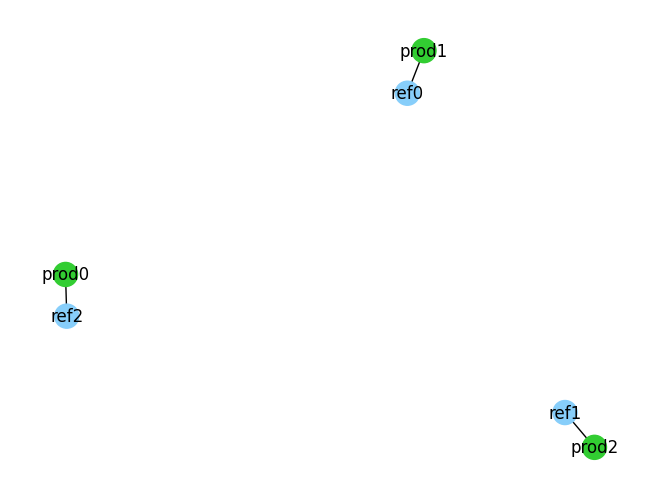

(id: 2 - cen: [ 2.58  3.62 -0.68  0.28  8.24  8.55  5.76  6.39] - rad: 1.13) SURVIVED as (id: 2 - cen: [ 2.21  3.56 -0.74  0.18  8.36  8.58  5.78  6.14] - rad: 0.97) (score: 0.8551250179914531)
(id: 0 - cen: [4.64 3.85 1.13 1.97 7.59 8.29 3.66 8.98] - rad: 0.93) SURVIVED as (id: 0 - cen: [4.64 3.85 1.13 1.97 7.59 8.29 3.66 8.98] - rad: 0.93) (score: 0.9999999999999989)
(id: 1 - cen: [ 6.73  4.51 -0.93 -0.04  7.24  8.48  7.39  7.59] - rad: 1.04) SURVIVED as (id: 1 - cen: [ 6.75  4.5  -0.94 -0.03  7.23  8.47  7.39  7.61] - rad: 1.02) (score: 0.988742517745066)
Final macroclusters:
(id: 0 - cen: [4.64 3.85 1.13 1.97 7.59 8.29 3.66 8.98] - rad: 0.93)
(id: 1 - cen: [ 6.75  4.5  -0.94 -0.03  7.23  8.47  7.39  7.61] - rad: 1.02)
(id: 2 - cen: [ 2.21  3.56 -0.74  0.18  8.36  8.58  5.78  6.14] - rad: 0.97)

-----------------------------------------------------------------------------------

number of colors defined: 20


c:\Users\manse\OneDrive\Desktop\dynamic-clustering\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\manse\OneDrive\Desktop\dynamic-clustering\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\manse\OneDrive\Desktop\dynamic-clustering\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\manse\OneDrive\Desktop\dynamic-clustering\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\manse\OneDrive\Desktop\dynamic-clustering\venv\Lib\site-packages\sklearn\ut

ValueError: 
    Invalid value of type 'numpy.float32' received for the 'x' property of scatter3d
        Received value: np.float32(11.149963)

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [13]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=False, print_graph=True, macroclustering_at_end=True)

clustream.visualization()

In [7]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/51142' and its contents removed successfully.
Deleted 51142
